<h3>BANK CUSTOMER CHURN PREDICTION</h3>

In [1]:
#libraries-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#The dataset-
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
#Shape of the dataset-
data.shape

(10000, 14)

In [4]:
#Checking for missing values-
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
#We will drop out row number and surname from our data
data=data.drop(["RowNumber","Surname","CustomerId"],axis=1)

In [7]:
#First 5 rows of left columns
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#Check variable data types-
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

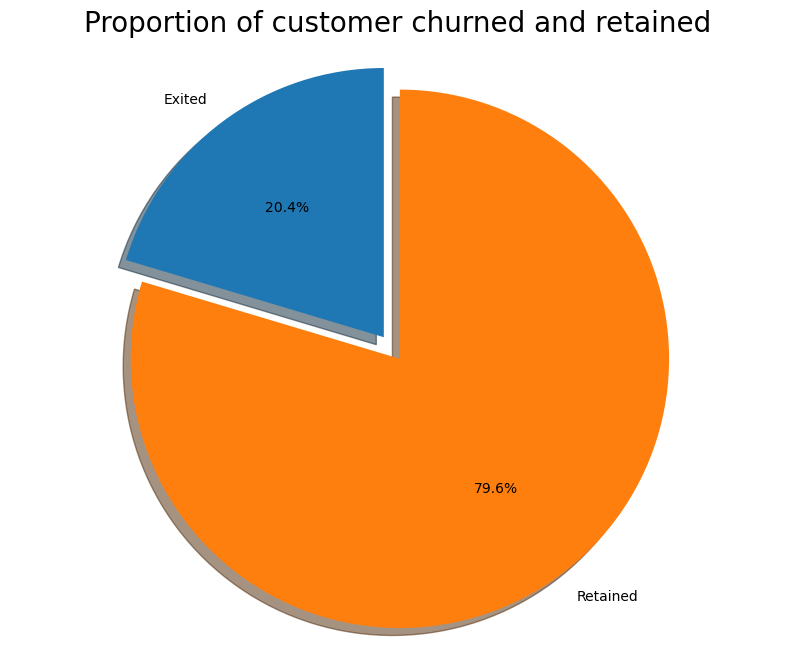

In [9]:
labels=['Exited','Retained']
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode=(0,0.1)
fig1,ax1=plt.subplots(figsize=(10,8))   
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)     
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()     
      

About 20% customers have churned.

<Axes: xlabel='IsActiveMember', ylabel='count'>

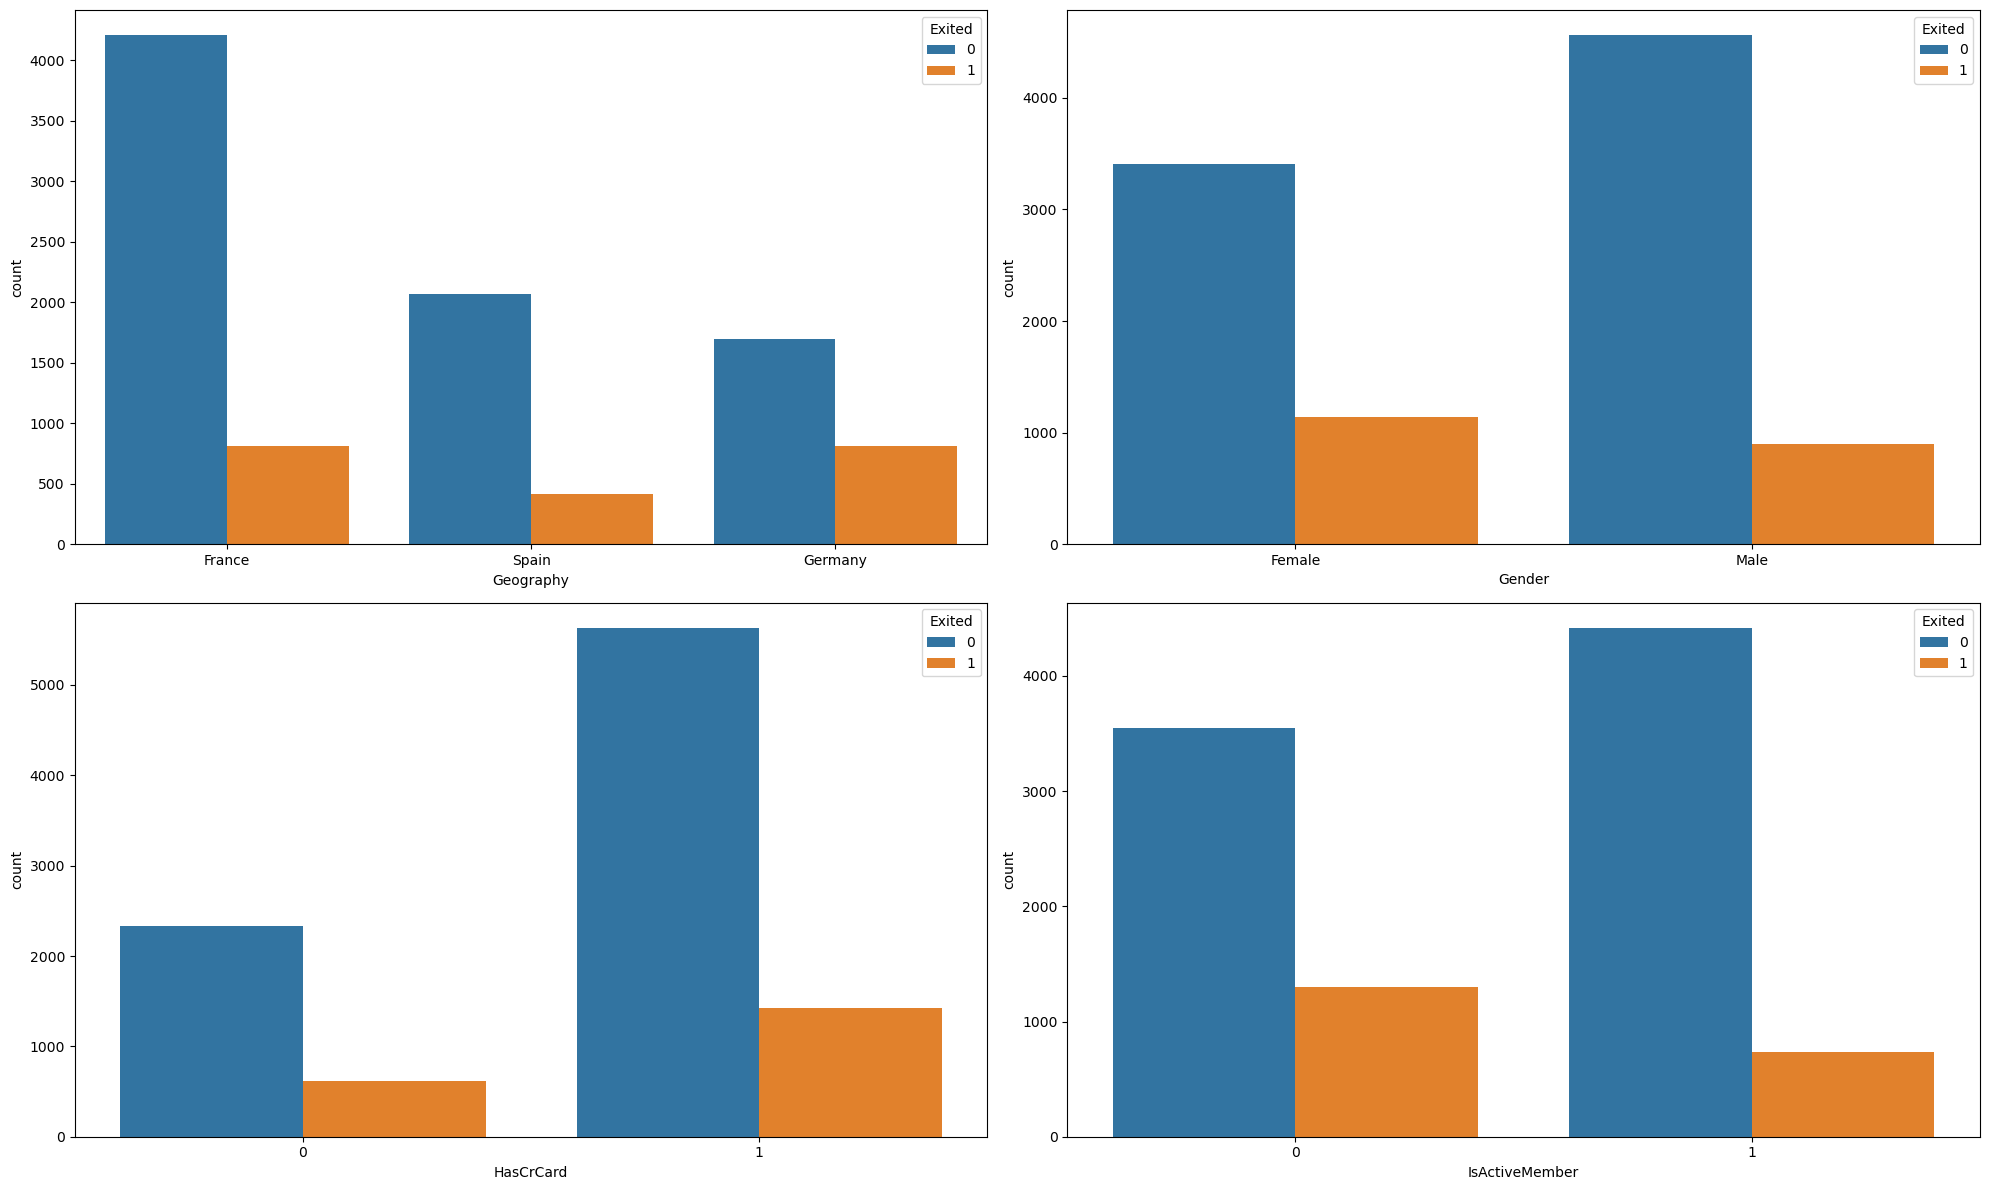

In [10]:
#We now review the 'Status' with the Categorical Variables-
fig, ax = plt.subplots(2, 2, figsize=(20, 12),tight_layout=True)
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=ax[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=ax[1][1])

1. Germany has the highest churn
2. Although Male customers are more than the female, churn rate is high for the female
3. More customer owing the credit card exited the bank
4. More inactive member has churned which is obvious here.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

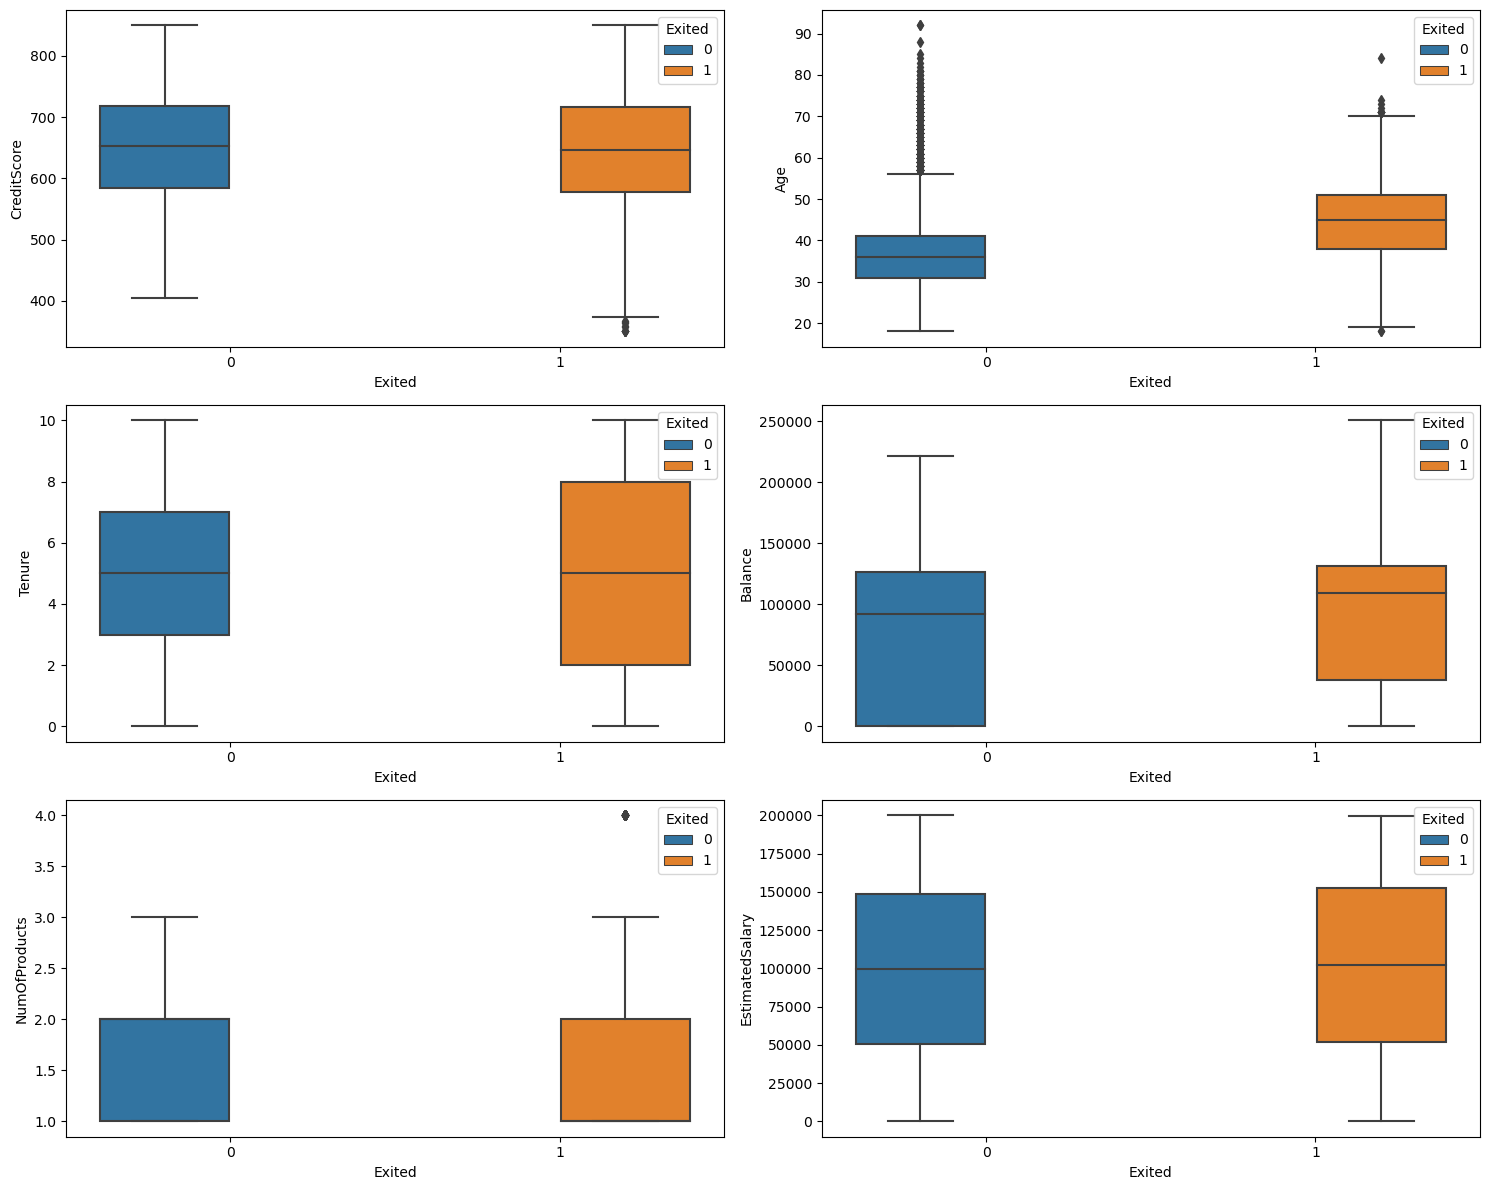

In [11]:
# Relations based on the continuous data attributes
fig, ax = plt.subplots(3, 2, figsize=(15, 12), tight_layout= True)
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=ax[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=ax[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=ax[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=ax[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=ax[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=ax[2][1])

1. Credit score doesn't seem to have any impact on Churning Rate
2. Persons with higher age seem to churn more than the younger people.
3. People with very high and very low tenure period seem to show churn
4. Churned Customers have higher average balance
5. Number of products and Estimated Salary don't have such impact on churn rate

ONE HOT ENCODING

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
#Transforming the Gender into 1 and 0s
ohe1=OneHotEncoder()
gender_transformed=ohe1.fit_transform(data[["Gender"]]).toarray()
gender_categories=ohe1.categories_[0]
data[gender_categories]=gender_transformed

In [14]:
#Transforming the Geography Column-
ohe2=OneHotEncoder()
geo_transformed=ohe2.fit_transform(data[["Geography"]]).toarray()
geo_categories=ohe2.categories_[0]
data[geo_categories]=geo_transformed

In [15]:
#Let us drop the Gender and Geography Column-
data=data.drop(["Gender","Geography"],axis=1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0,0.0,0.0,1.0


<Axes: >

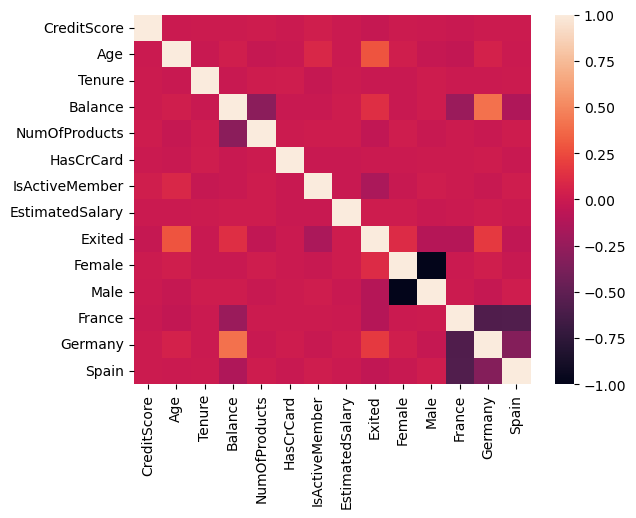

In [16]:
sns.heatmap(data.corr())

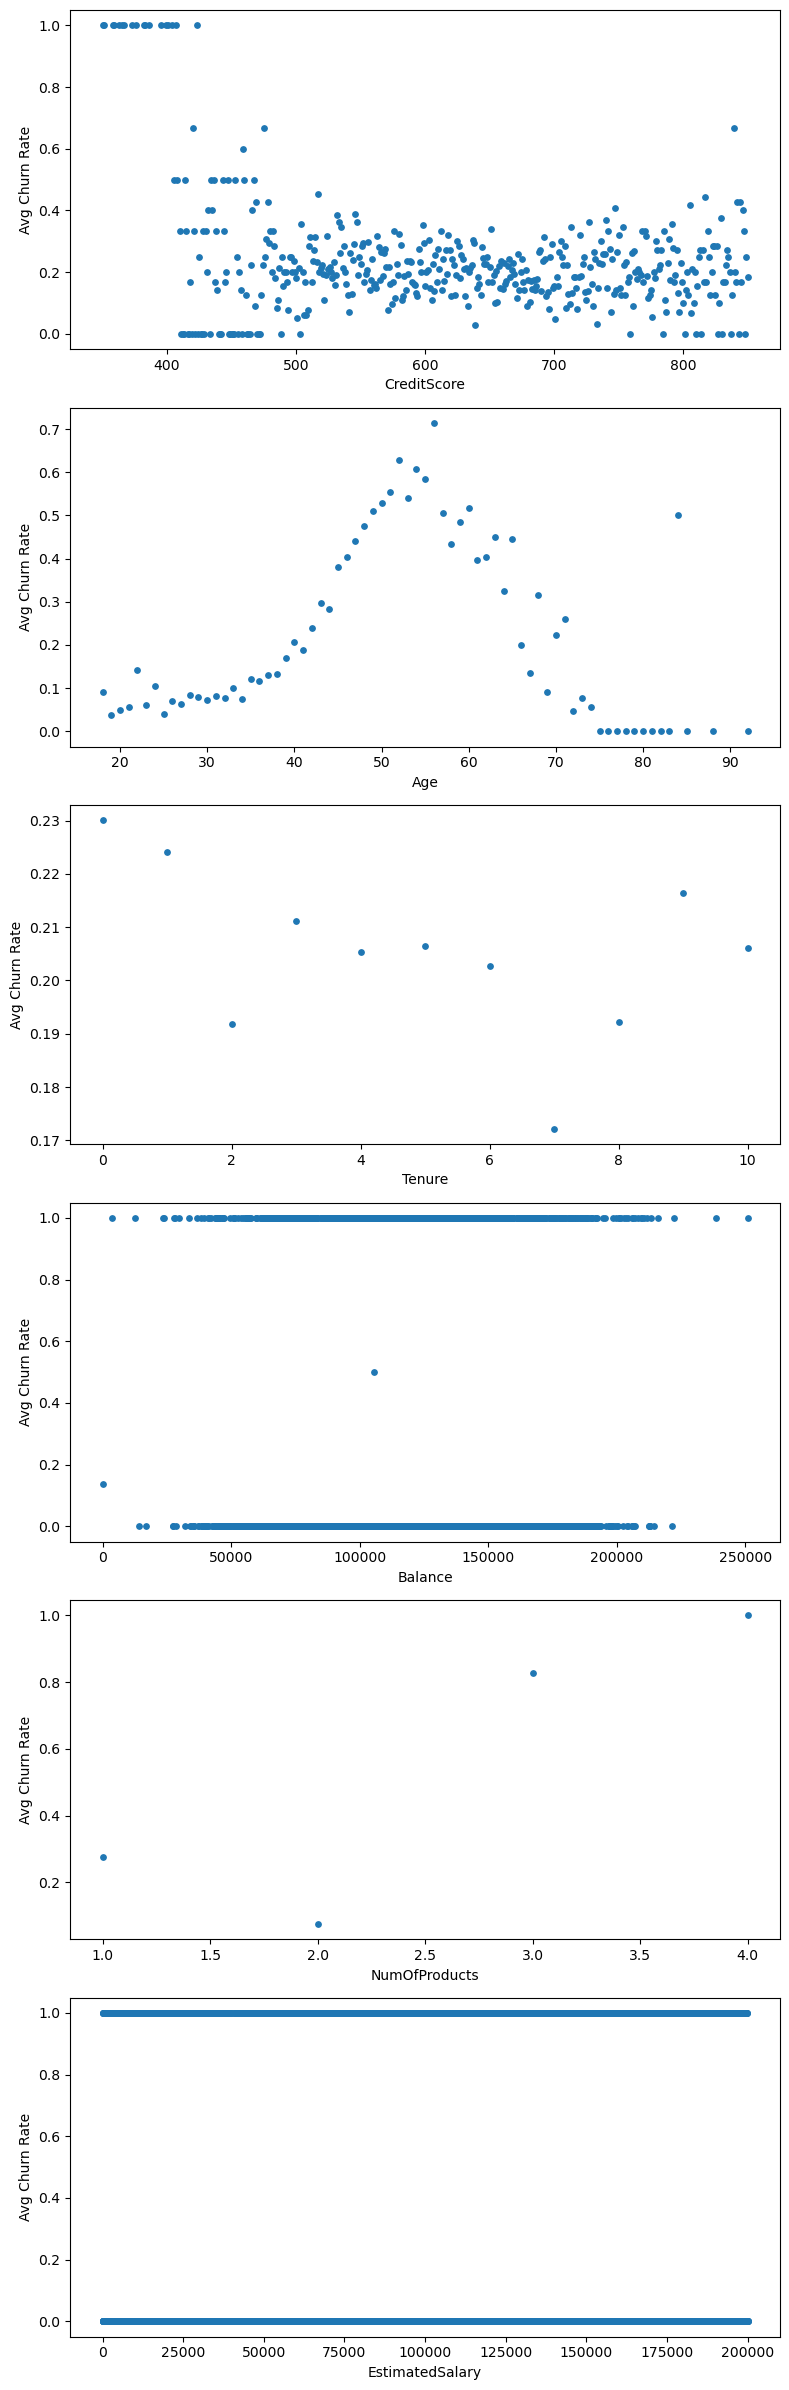

In [17]:
continuous_variables = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
fig, ax = plt.subplots(6, figsize = (8,24), tight_layout = True)
for item in continuous_variables:
    data_plot = data.groupby(item).Exited.mean().reset_index()
    ax[continuous_variables.index(item)].scatter(x = data_plot[item], y = data_plot.Exited, s = 15)
    ax[continuous_variables.index(item)].set_xlabel(item)
    ax[continuous_variables.index(item)].set_ylabel("Avg Churn Rate")
plt.show()

1. A very low credit score seems to have more churn rate
2. People with age between 40-70 have more churn rate than others.

FEATURE ENGINEERING

We will make the following three features-
1. Balance vs Salary Ratio
2. Tenure vs Age Ratio
3. Credit Score vs Age Ratio

In [18]:
data['BalanceSalaryRatio']=data.Balance/data.EstimatedSalary
data['TenureByAge']=data.Tenure/data.Age
data['CreditScoreGivenAge']=data.CreditScore/data.Age
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,1.0,0.0,0.0,0.000000,0.047619,14.738095
1,608,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0,0.0,0.0,1.0,0.744677,0.024390,14.829268
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,1.0,0.0,0.0,1.401375,0.190476,11.952381
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,1.0,0.0,0.0,0.000000,0.025641,17.923077
4,850,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0,0.0,0.0,1.0,1.587055,0.046512,19.767442


(-1.0, 5.0)

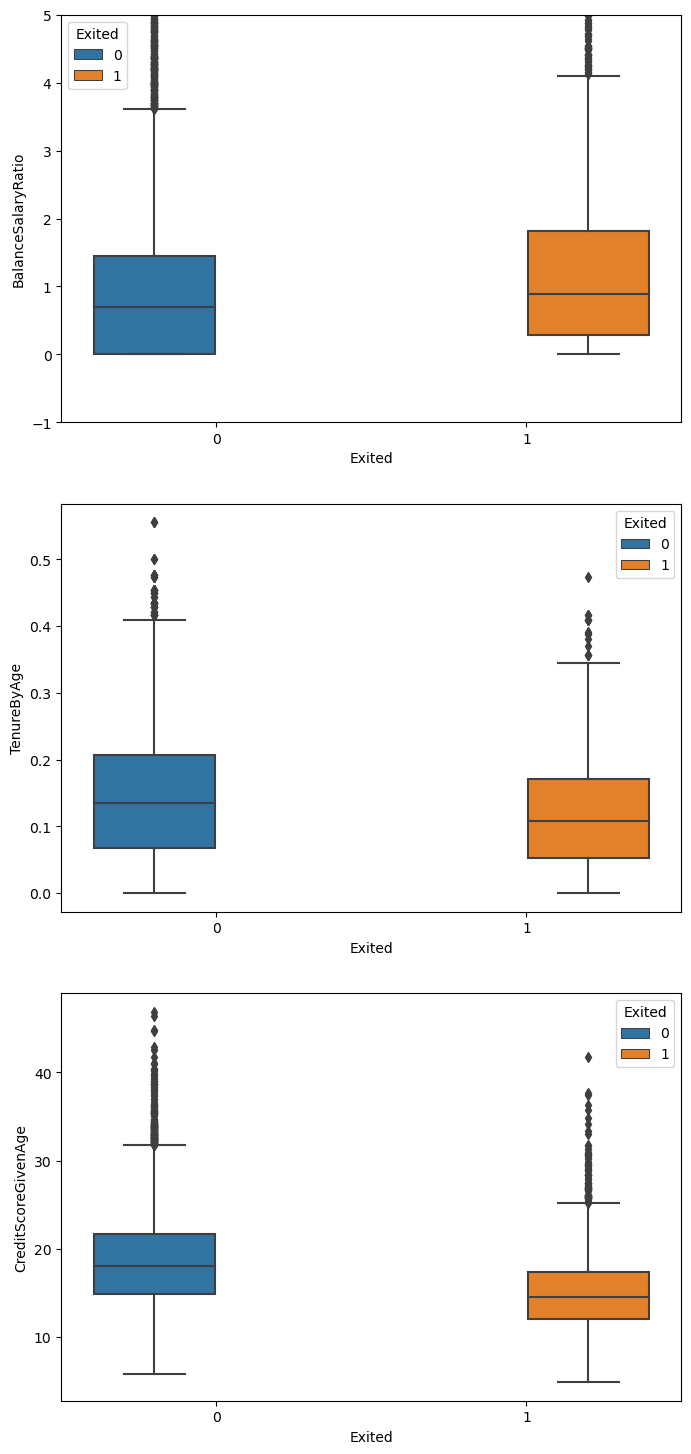

In [19]:
#Engineered Features vs Customer Churn-
fig,ax= plt.subplots(3,figsize=(8,18))
sns.boxplot(y='BalanceSalaryRatio',x='Exited',hue='Exited',data=data,ax=ax[0])
sns.boxplot(y='TenureByAge',x='Exited',hue='Exited',data=data,ax=ax[1])
sns.boxplot(y='CreditScoreGivenAge',x='Exited',hue='Exited',data=data,ax=ax[2])
ax[0].set_ylim(-1,5)

We have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.
We also notice that customers with low CreditScore/Age are more likely to churn. 

MINMAX SCALING-
Due to varying Range of Features we will scale the continuous variables using MinMax Scaling.

In [20]:
#Required Library-
from sklearn.preprocessing import MinMaxScaler
to_scale = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
scaler = MinMaxScaler()
data[to_scale] = scaler.fit_transform(data[to_scale])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1.0,0.0,1.0,0.0,0.0,0.000000,0.085714,0.235083
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,1.0,0.0,0.0,0.0,1.0,0.000070,0.043902,0.237252
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.0,0.0,1.0,0.0,0.0,0.000132,0.342857,0.168807
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1.0,0.0,1.0,0.0,0.0,0.000000,0.046154,0.310859
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.0,0.0,0.0,0.0,1.0,0.000150,0.083721,0.354739


TRAIN TEST SPLIT-

In [21]:
X=data.drop("Exited",axis=1)
Y=data['Exited']

In [22]:
# For splitting data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [23]:
#Before Model Building we will find out the that play an important role in customer churning-
import statsmodels.api as sm
model = sm.Logit(Y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.426335
         Iterations 7


In [24]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7985
Method:                           MLE   Df Model:                           14
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                  0.1623
Time:                        09:34:27   Log-Likelihood:                -3410.7
converged:                       True   LL-Null:                       -4071.6
Covariance Type:            nonrobust   LLR p-value:                1.117e-273
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
CreditScore             1.9477      0.371      5.251      0.000       1.221       2.675
Age                     0.3114      0.654      0.477      0.634      -0.969       1.592
Tenure          

Features having absolute p value less than 0.05 will be considered signifcant-
CreditScore, Balance, IsActiveMember, CreditScoreGivenAge

MODELLING-
1. Logistic Regresion
2. SVM
3. Ensemble Models- Random Forest, Extreme Gradient Boosting


FOR MODELLING

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

HYPERPARAMETER TUNING

In [26]:
#Hyperparameter Tuning for Logistic Regression-
param_grid = {'C': [0.5,1,10,100,500], 'max_iter' : [250, 300, 500], 'tol':[0.00001,0.0001,0.000001]}
lr_grid = GridSearchCV(LogisticRegression(),param_grid, cv=10)
lr_grid.fit(X_train, Y_train)
print(lr_grid.best_score_)    
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.811375
{'C': 500, 'max_iter': 250, 'tol': 1e-05}
LogisticRegression(C=500, max_iter=250, tol=1e-05)


In [27]:
#Hyperparameter Tuning for Logistic with 2 degree Polynomial-
X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
param_grid = {'C': [0.5,1,10,100], 'max_iter' : [300, 500], 'tol':[0.00001,0.0001]}
lr_poly_grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5)
lr_poly_grid.fit(X_train_poly, Y_train)
print(lr_poly_grid.best_score_)    
print(lr_poly_grid.best_params_)
print(lr_poly_grid.best_estimator_)

0.8595
{'C': 100, 'max_iter': 300, 'tol': 1e-05}
LogisticRegression(C=100, max_iter=300, solver='liblinear', tol=1e-05)


In [28]:
#Hyperparameter Tuning for SVM with polynomial kernel-
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid_poly= GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid_poly.fit(X_train,Y_train)
print(SVM_grid_poly.best_score_)
print(SVM_grid_poly.best_params_)
print(SVM_grid_poly.best_estimator_)

0.8518749016087918
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [29]:
#Hyperparameter Tuning for SVM with RBF kernel-
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train,Y_train)
print(SVM_grid.best_score_)
print(SVM_grid.best_params_)
print(SVM_grid.best_estimator_)

0.8533746672513648
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [30]:
#Hyperparameter Tuning for Random Forest-
param_grid = {'max_depth': [5, 6, 7, 8], 'max_features': [4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
rf_grid = GridSearchCV(RandomForestClassifier(),param_grid, cv=5)
rf_grid.fit(X_train, Y_train)
print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

0.8662500000000002
{'max_depth': 8, 'max_features': 8, 'min_samples_split': 7, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=7)


In [31]:
#Hyperparameter Tuning for XGBoost-
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100], 'min_child_weight':[1,5,10]}
xgb_grid = GridSearchCV(XGBClassifier(),param_grid, cv=5)
xgb_grid.fit(X_train, Y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)

0.865375
{'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 20}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Fitting Best Models-

In [32]:
#For accuracy checking-
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [33]:
#Logistic Regression----
lr_model = LogisticRegression(C=10, max_iter=250, tol=1e-05)
lr_model.fit(X_train, Y_train)
lr_yhat = lr_model.predict(X_train)
print(classification_report(Y_train, lr_yhat))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6350
           1       0.63      0.22      0.33      1650

    accuracy                           0.81      8000
   macro avg       0.73      0.59      0.61      8000
weighted avg       0.79      0.81      0.78      8000



In [34]:
#Polynomial Logistic Regression----
X_train_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
lr_poly_model = LogisticRegression(C=100, max_iter=300, solver='liblinear', tol=1e-05)
lr_poly_model.fit(X_train_poly, Y_train)
lr_poly_yhat = lr_poly_model.predict(X_train_poly)
print(classification_report(Y_train, lr_poly_yhat))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6350
           1       0.77      0.49      0.60      1650

    accuracy                           0.86      8000
   macro avg       0.83      0.73      0.76      8000
weighted avg       0.86      0.86      0.85      8000



In [35]:
#SVM with RBF kernl----
SVM_RBF_model= SVC(C=150, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF_model.fit(X_train,Y_train)
SVM_RBF_yhat=SVM_RBF_model.predict(X_train)
print(classification_report(Y_train, SVM_RBF_yhat))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6350
           1       0.84      0.40      0.54      1650

    accuracy                           0.86      8000
   macro avg       0.85      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [36]:
#SVM with Polynomial kernl----
SVM_POL_model= SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL_model.fit(X_train,Y_train)
SVM_POL_yhat=SVM_POL_model.predict(X_train)
print(classification_report(Y_train, SVM_POL_yhat))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6350
           1       0.84      0.36      0.50      1650

    accuracy                           0.85      8000
   macro avg       0.85      0.67      0.71      8000
weighted avg       0.85      0.85      0.83      8000



In [37]:
#Random Forest Model----
rf_model = RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=6, n_estimators = 50)
rf_model.fit(X_train, Y_train)
rf_yhat = rf_model.predict(X_train)
print(classification_report(Y_train, rf_yhat))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6350
           1       0.87      0.52      0.65      1650

    accuracy                           0.88      8000
   macro avg       0.88      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000



In [38]:
#XGBoosting----
xgb_model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0,reg_alpha=0, reg_lambda=1)
xgb_model.fit(X_train, Y_train)
xgb_yhat = xgb_model.predict(X_train)
print(classification_report(Y_train, xgb_yhat))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6350
           1       0.85      0.51      0.64      1650

    accuracy                           0.88      8000
   macro avg       0.87      0.74      0.78      8000
weighted avg       0.88      0.88      0.87      8000



ROC AUC scores and FPR - TPR calculations

In [42]:
lr_score = roc_auc_score(Y_train, lr_yhat)
lr_yhat_prob = lr_model.predict_proba(X_train)[:,1]
lr_fpr, lr_tpr, t1 = roc_curve(Y_train, lr_yhat_prob)

lr_poly_score = roc_auc_score(Y_train, lr_poly_yhat)
lr_poly_yhat_prob = lr_poly_model.predict_proba(X_train_poly)[:,1]
lr_poly_fpr, lr_poly_tpr, t2 = roc_curve(Y_train, lr_poly_yhat_prob)

svm_poly_score = roc_auc_score(Y_train,SVM_POL_yhat )
svm_poly_yhat_prob = SVM_POL_model.predict_proba(X_train)[:,1]
svm_poly_fpr, svm_poly_tpr, t2 = roc_curve(Y_train, svm_poly_yhat_prob)

svm_rbf_score = roc_auc_score(Y_train,SVM_RBF_yhat )
svm_rbf_yhat_prob = SVM_RBF_model.predict_proba(X_train)[:,1]
svm_rbf_fpr, svm_rbf_tpr, t2 = roc_curve(Y_train, svm_rbf_yhat_prob)

rf_score = roc_auc_score(Y_train, rf_yhat)
rf_yhat_prob = rf_model.predict_proba(X_train)[:,1]
rf_fpr, rf_tpr, t3 = roc_curve(Y_train, rf_yhat_prob)

xgb_score = roc_auc_score(Y_train, xgb_yhat)
xgb_yhat_prob = xgb_model.predict_proba(X_train)[:,1]
xgb_fpr, xgb_tpr, t4 = roc_curve(Y_train, xgb_yhat_prob)

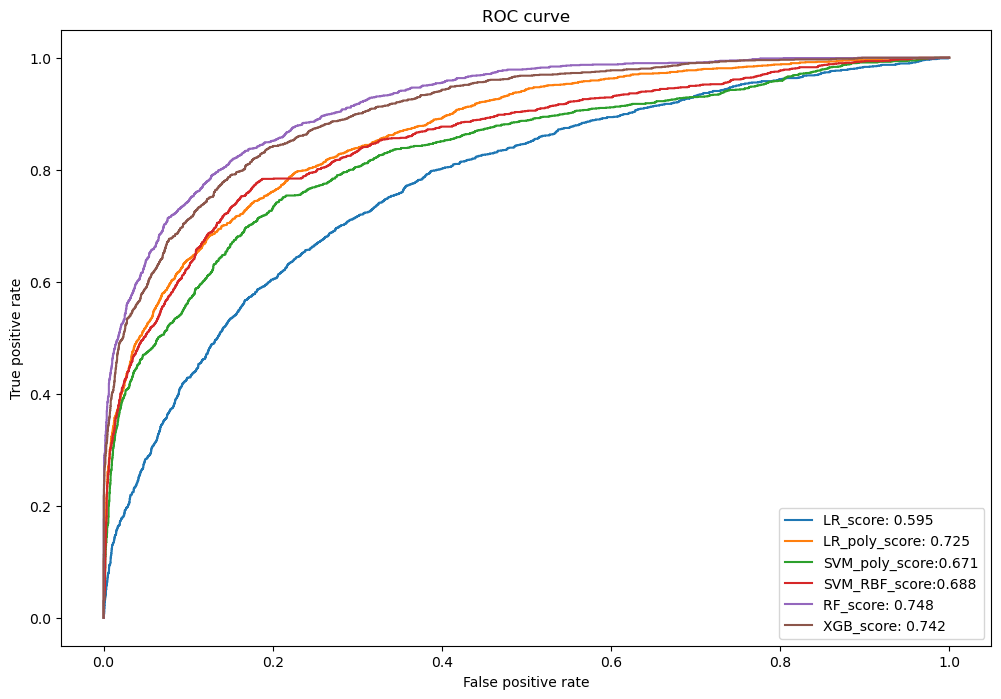

In [43]:
plt.figure(figsize = (12, 8), linewidth = 1)
plt.plot(lr_fpr, lr_tpr, label = "LR_score: " + str(round(lr_score, 3)))
plt.plot(lr_poly_fpr, lr_poly_tpr, label = "LR_poly_score: " + str(round(lr_poly_score, 3)))
plt.plot(svm_poly_fpr, svm_poly_tpr, label = "SVM_poly_score:"+ str(round(svm_poly_score, 3)))
plt.plot(svm_rbf_fpr, svm_rbf_tpr, label = "SVM_RBF_score:"+ str(round(svm_rbf_score, 3)))
plt.plot(rf_fpr, rf_tpr, label = "RF_score: " + str(round(rf_score, 3)))
plt.plot(xgb_fpr, xgb_tpr, label = "XGB_score: " + str(round(xgb_score, 3)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.title(label = "ROC curve")
plt.show()

As discussed before, the focus of this model was based on the amount of correctly predicted 'churned' customers as well as the amount of actually churned customers that were predicted correctly, or in other words, precision and recall based on 1s. This is in concern with the resources that the bank will have to use towards the strategy building, to target the customers who might churn based on the probability calculated by the model.
As we can see from the plot above, RF classifier has the highest score of all, with a precision score on 1's of 0.87, out of all customers that the model thinks will churn, 87% do actually churn and with the recall score of 0.5

TEST PREDICTIONS

Using Random Forest Model, we will find out how it performs on the test data.

In [44]:
rf_yhat_test = rf_model.predict(X_test)
print(classification_report(Y_test, rf_yhat_test))
rf_score_test = roc_auc_score(Y_test, rf_yhat_test)
rf_yhat_test_prob = rf_model.predict_proba(X_test)[:,1]
rf_fpr_test, rf_tpr_test, t5 = roc_curve(Y_test, rf_yhat_test_prob)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1613
           1       0.78      0.45      0.57       387

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.86      2000



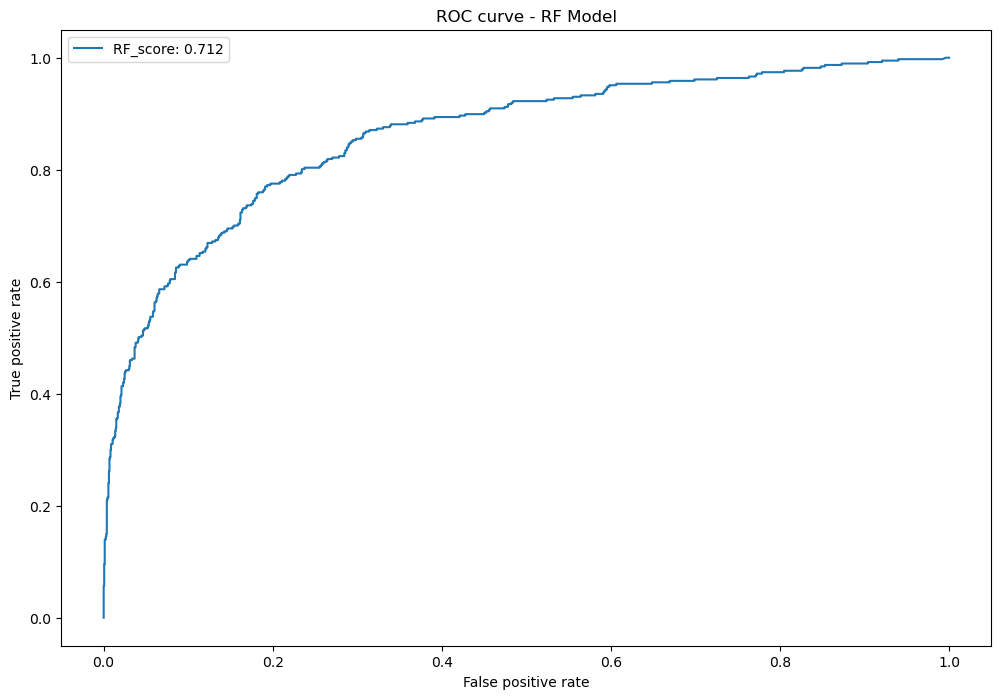

In [45]:
plt.figure(figsize = (12, 8), linewidth = 1)
plt.plot(rf_fpr_test, rf_tpr_test, label = "RF_score: " + str(round(rf_score_test, 3)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.title(label = "ROC curve - RF Model")
plt.show()

Feature Importance

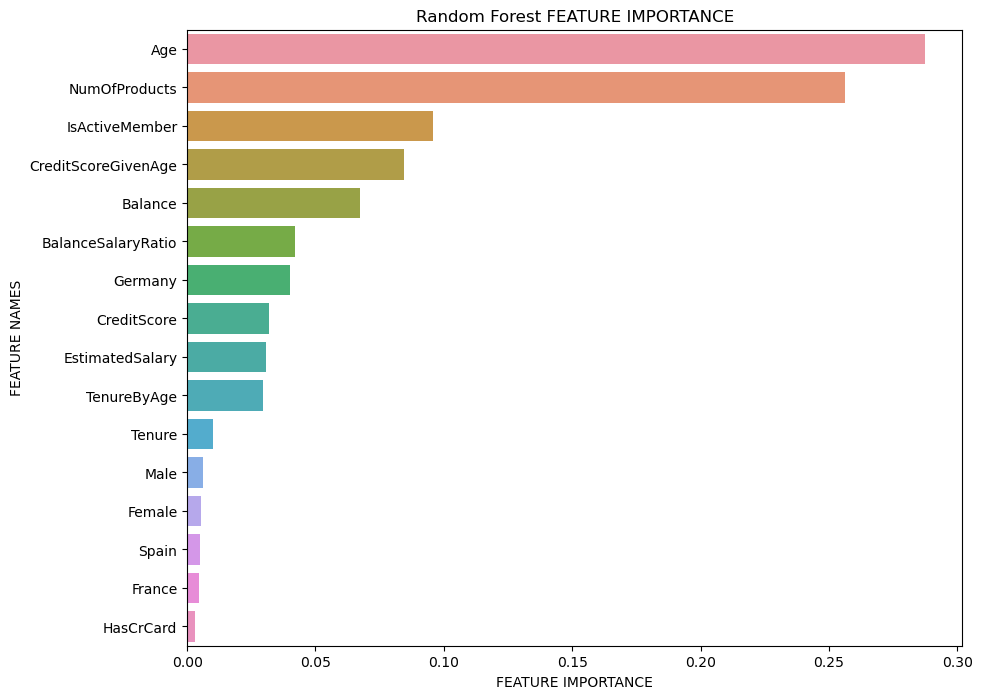

In [46]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(rf_model.feature_importances_,X_test.columns,'Random Forest')

Conclusion
Testing resulted in the accuracy of 0.87 and slightly reduced AUC score (0.708), with an F1 score of 0.92 on retained customers and 0.60 on churned customers.
Out of all the actual churned customers, the model has predicted 49% correctly. Out of all the predicted churned customers, 76% actually churned.
These numbers can be improved by implementing the model with more data over time and also by introducing better features provided that context for the features is known for better feature engineering.

Finally, the best way to use this model is assigning Churn Probability for each customer, create segments, and build strategies on top of that.